## GOBAI-O2-v1.0 (vertical mean: 0-200m; 200-600m)

In [1]:
import os
import xarray as xr
import numpy as np
import netCDF4
import matplotlib.pyplot as plt
from matplotlib import cm,colors,gridspec,rc
USER = os.environ['USER']

In [2]:
path = f'/glade/scratch/{USER}/DPLE-results'
filename = f'{path}/EN4_FOSI_T_LME_mean_195401-201712_monthly.nc'
ds = xr.open_dataset(filename)
layer1 = '0-200m'
layer2 = '200-600m'
var1 = 'EN4_T'
var2 = 'FOSI_T'
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)

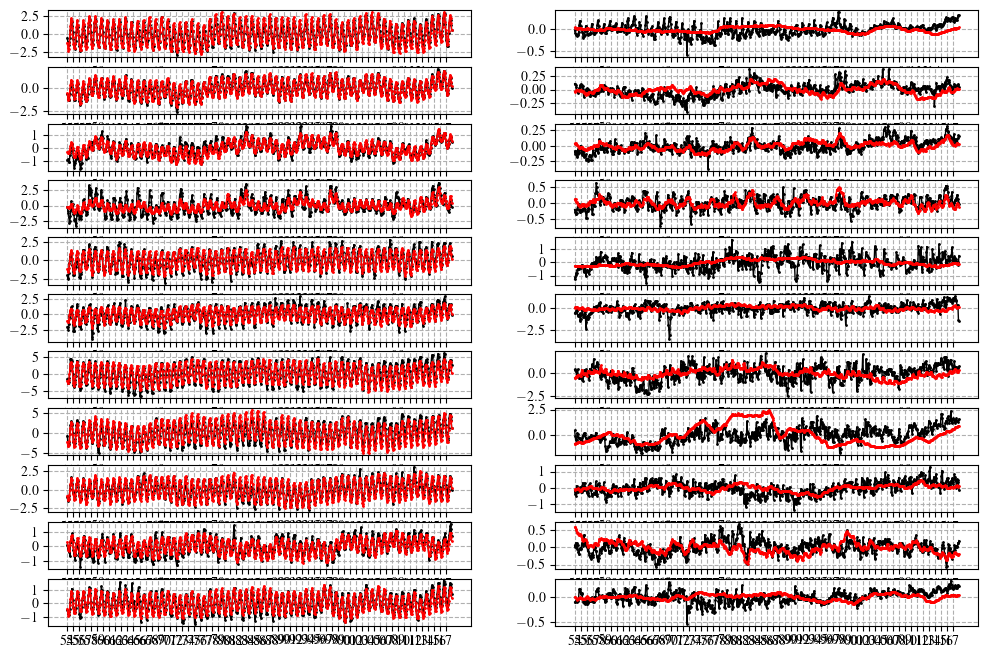

In [8]:
fig = plt.figure(figsize=[12, 8])
gs = gridspec.GridSpec(11, 2) #,width_ratios=[1,1,1,0.00001])
for vv, layer in [[0,layer1],[1, layer2]]:
    for box in range(11):
    #ax = fig.add_axes([0.07,0.05+(1-vv)*0.48,0.8,0.43])
        ax = fig.add_subplot(gs[box,vv])
        O2_obs = ds[f'{var1}_{layer}'].values[box,:]
        O2_mod = ds[f'{var2}_{layer}'].values[box,:]
        #
        ax.plot(range(768),O2_obs-O2_obs.mean(),color='k',lw=1,marker='o',markersize=1)
        ax.plot(range(768),O2_mod-O2_mod.mean(),color='r',lw=1,marker='o',markersize=1)
        #
        #ax.set_xlim(lon_min,lon_max)
        #ax.set_ylim(lat_min,lat_max)
        ax.set_xticks(np.arange(0,768,12))
        ax.set_xticklabels([str(ii)[2:] for ii in range(1954,2018,1)])
        #ax.set_yticks(np.arange(15, 66, 10))
        ax.grid(linestyle='dashed')

output=f'/glade/scratch/{USER}/DPLE-plots'
outfile=f'{output}/EN4_FOSI_T_{layer1}_{layer2}_LME_mean_monthly_timeseries_195401-201712.png'
#plt.savefig(outfile,dpi=400)
plt.show()

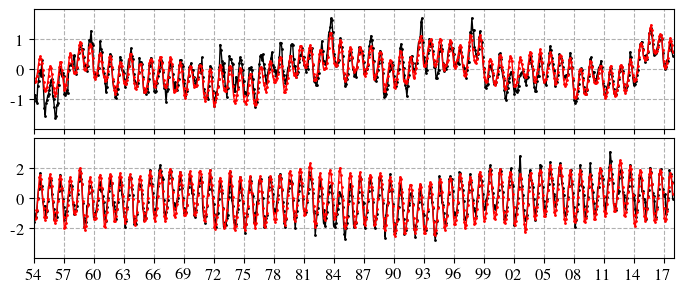

In [10]:
fig = plt.figure(figsize=[8, 3])
gs = gridspec.GridSpec(2, 1) #,width_ratios=[1,1,1,0.00001])
for vv, layer in [[0,layer1]]:#,[1, layer2]]:
    for hh,box in [[0,2],[1,8]]:
    #ax = fig.add_axes([0.07,0.05+(1-vv)*0.48,0.8,0.43])
        #ax = fig.add_subplot(gs[hh,vv])
        ax = fig.add_axes([0.06,0.10+(1-hh)*0.43,0.8,0.4])
        O2_obs = ds[f'{var1}_{layer}'].values[box,:]
        O2_mod = ds[f'{var2}_{layer}'].values[box,:]
        #
        ax.plot(range(768),O2_obs-O2_obs.mean(),color='k',lw=1.,marker='o',markersize=1)
        ax.plot(range(768),O2_mod-O2_mod.mean(),color='r',lw=1.,marker='o',markersize=1)
        #
        ax.set_xlim(0,768)
        #ax.set_ylim(lat_min,lat_max)
        ax.set_xticks(np.arange(0,768,36))
        
        if hh == 0:
            ax.set_yticks(np.arange(-1,2,1))
            ax.set_yticklabels([str(ii) for ii in np.arange(-1,2,1)],fontsize=12)
            ax.set_ylim(-2,2)
            ax.set_xticklabels([],fontsize=12)
        elif hh == 1:
            ax.set_yticks(np.arange(-2,3,2))
            ax.set_yticklabels([str(ii) for ii in np.arange(-2,3,2)],fontsize=12)
            ax.set_ylim(-4,4)
            ax.set_xticklabels([str(ii)[2:] for ii in range(1954,2018,3)],fontsize=12)
        #ax.set_yticks(np.arange(15, 66, 10))
        ax.grid(linestyle='dashed')
        #ax.set_ylabel('O$_2$ Anomaly [mmol kg$^{-1}$]')

output=f'/glade/scratch/{USER}/DPLE-plots'
outfile=f'{output}/EN4_FOSI_T_{layer1}_{layer2}_LME_mean_monthly_timeseries_195401-201712.png'
plt.savefig(outfile,dpi=400)
plt.show()

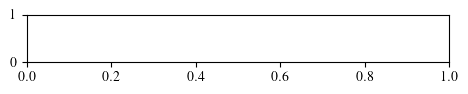

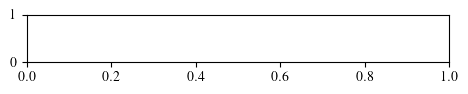

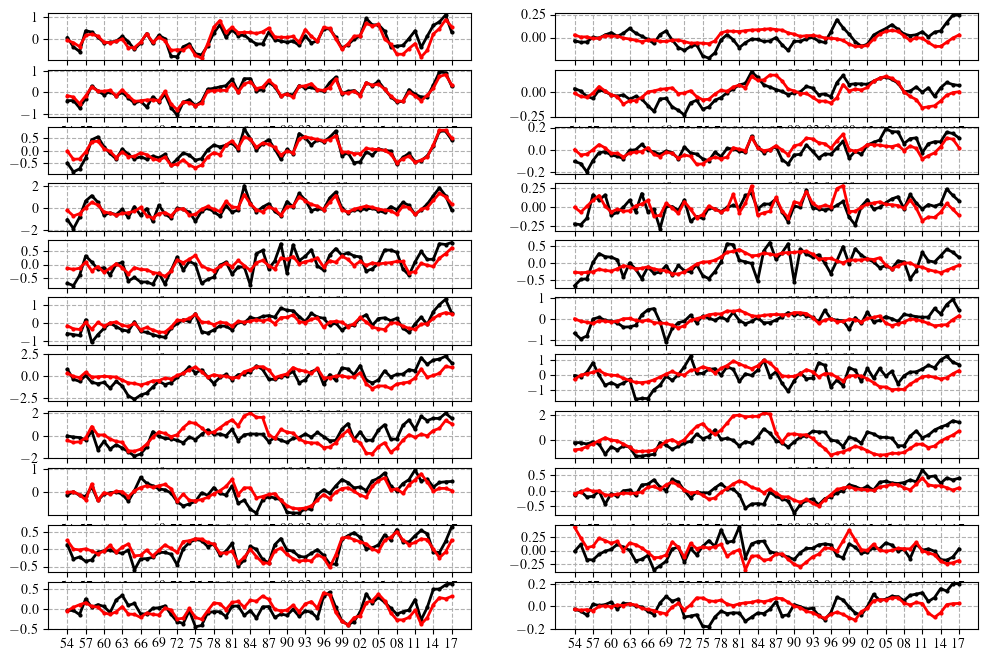

In [13]:
fig = plt.figure(figsize=[12, 8])
gs = gridspec.GridSpec(11, 2) #,width_ratios=[1,1,1,0.00001])
for vv, layer in [[0,layer1],[1, layer2]]:
    for box in range(11):
    #ax = fig.add_axes([0.07,0.05+(1-vv)*0.48,0.8,0.43])
        ax = fig.add_subplot(gs[box,vv])
        O2_obs = ds[f'{var1}_{layer}'].values[box,:]
        O2_mod = ds[f'{var2}_{layer}'].values[box,:]
        #
        O2_obsy = np.reshape(O2_obs,[64,12])
        O2_obsy = np.mean(O2_obsy,axis=1)
        #
        O2_mody = np.reshape(O2_mod,[64,12])
        O2_mody = np.mean(O2_mody,axis=1)
        #
        ax.plot(range(64),O2_obsy-O2_obsy.mean(),color='k',lw=2,marker='o',markersize=2)
        ax.plot(range(64),O2_mody-O2_mody.mean(),color='r',lw=2,marker='o',markersize=2)
        #
        #ax.set_xlim(lon_min,lon_max)
        #ax.set_ylim(lat_min,lat_max)
        ax.set_xticks(np.arange(0,64,3))
        ax.set_xticklabels([str(ii)[2:] for ii in range(1954,2018,3)])
        #ax.set_yticks(np.arange(15, 66, 10))
        ax.grid(linestyle='dashed')

output=f'/glade/scratch/{USER}/DPLE-plots'
outfile=f'{output}/EN4_FOSI_T_{layer1}_{layer2}_LME_mean_monthly_timeseries_195401-201712.png'
#plt.savefig(outfile,dpi=400)
plt.show()